In [65]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture


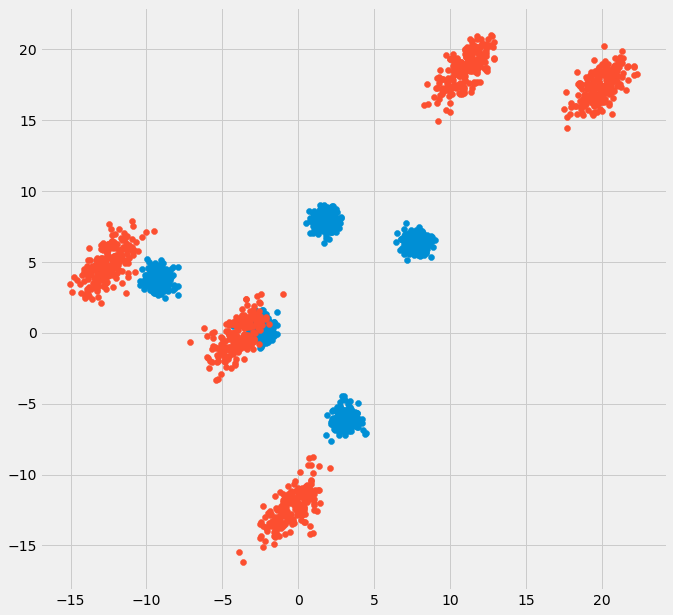

In [66]:
plt.figure(figsize=(10,10))
# 0. Create dataset
X,Y = make_blobs(cluster_std=0.5,random_state=20,n_samples=1000,centers=5)
plt.scatter(X[:,0],X[:,1])
#print(X)
#print(Y)
##################################################
###### Stratch dataset to get ellipsoid data######
##################################################
X = np.dot(X,np.random.RandomState(0).randn(2,2))
x,y = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
XY = np.array([x.flatten(),y.flatten()]).T
plt.scatter(X[:,0],X[:,1])
plt.show()

In [67]:
GMM = GaussianMixture(n_components=5).fit(X) # Instantiate and fit the model
print('Converged:',GMM.converged_) # Check if the model has converged
means = GMM.means_ 
covariances = GMM.covariances_


Converged: True


In [69]:
# Predict
Y = np.array([[0.5],[0.5]])
prediction = GMM.predict_proba(Y.T)
print(prediction)


[[4.00098007e-33 5.02664415e-44 9.36305075e-82 1.00000000e+00
  1.94756664e-93]]


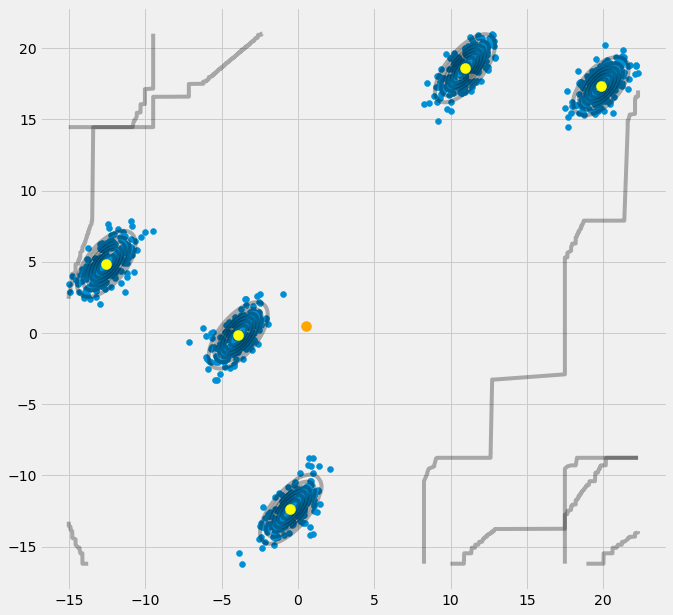

In [77]:
# Plot   
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.scatter(X[:,0],X[:,1])
ax0.scatter(Y[0,:],Y[1,:],c='orange',zorder=10,s=100)
for m,c in zip(means,covariances):
    multi_normal = multivariate_normal(mean=m,cov=c)
    ax0.contour(np.sort(X[:,0]),np.sort(X[:,1]),multi_normal.pdf(XY).reshape(len(X),len(X)),colors='black',alpha=0.3)
    
    ax0.scatter(m[0],m[1],c='yellow',zorder=10,s=100)
    
plt.show()

In [50]:
x = np.arange(-5.0,5.0,0.1)
y = np.arange(-5.0,5.0,0.1)
xx,yy = np.meshgrid(x,y)

In [61]:
z= np.sin(xx**2 + yy**2)/(xx**2+yy**2)

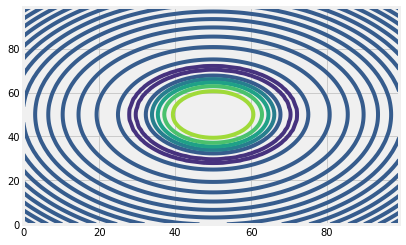

In [62]:
plt.contour(z);